In [1]:
from pandas import pandas as pd
import numpy as np

In [2]:
from scipy import stats
from scipy import spatial
import seaborn as sns




In [3]:
data = pd.read_csv('flights.csv')

In [4]:
data.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [5]:
data['dep_delay'].mean()

12.639070257304708

We need to Remove noise from data, for example there is some 
large or small numbers in this data set, that affects our mean result.

In [6]:
trimmed = stats.trim_mean(data['dep_delay'], 10/100)
trimmed


4.798201334709118

We can see after trimming 20% of noise data [10%, data , 10%] mean is more realistic than before.
So Lets take standard deviation:


In [7]:
data['dep_delay'].std()

40.21006089212995

In [8]:
data['dep_delay'].max()

1301.0

In [9]:
data['dep_delay'].min()


-43.0

In [10]:
data['dep_delay'].median()

-2.0

In [11]:
data['dep_delay'].mean()

12.639070257304708

In [12]:
data['dep_delay'].mode()

0   -5.0
Name: dep_delay, dtype: float64

"MODE" is the most repeatative item in data set.

In [13]:
 data['arr_delay'].mode()

0   -13.0
Name: arr_delay, dtype: float64

<Axes: >

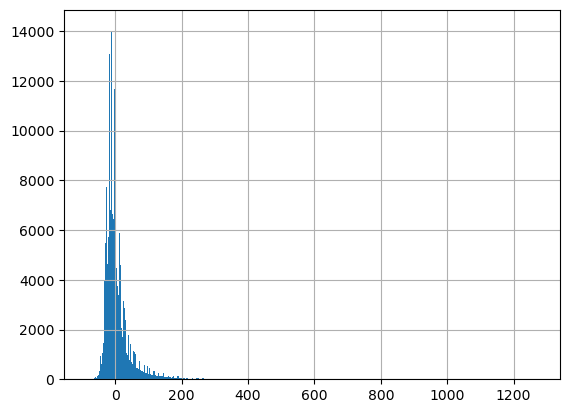

In [14]:
data['arr_delay'].hist(bins=1000)


In [15]:
filtered = data[(data['arr_delay']!=None) & (data['arr_delay']<100)]

<Axes: >

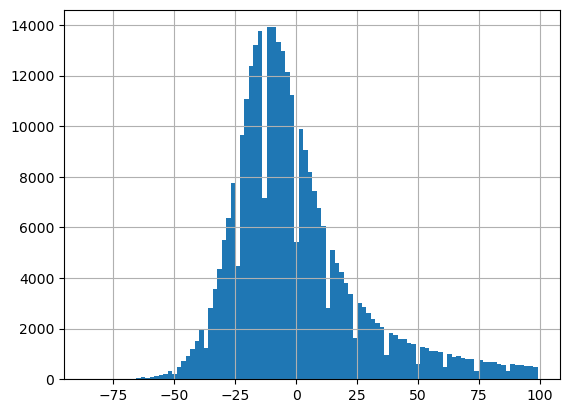

In [16]:
filtered['arr_delay'].hist(bins=100)

## Central Limit Theorem

If we knew the distribution of data follows the normal distribution we can say:

~68% of our data is in range of [-1*(std_dev)+(mean), 1*(std_dev)+(mean)]

~95% of our data is in range of [-2*(std_dev)+(mean), 2*(std_dev)+(mean)]

~99.7% of our data is in range of [-3*(std_dev)+(mean), 3*(std_dev)+(mean)]


In [17]:
sample = np.random.binomial(400, 1/10, 1000)

<Axes: ylabel='Count'>

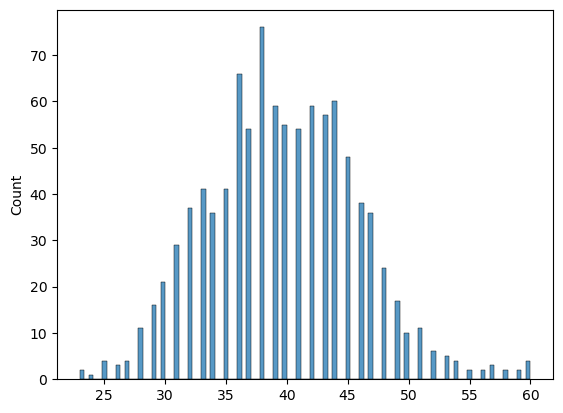

In [18]:
sns.histplot(sample,bins=100)


<Axes: ylabel='Count'>

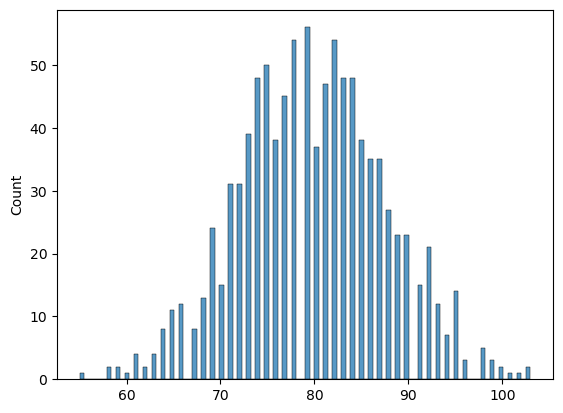

In [19]:
# generate a binomial sample
sample = stats.binom(400,0.2)
# plot the histogram
sns.histplot(sample.rvs(size=1000), bins=100)


<Axes: ylabel='Count'>

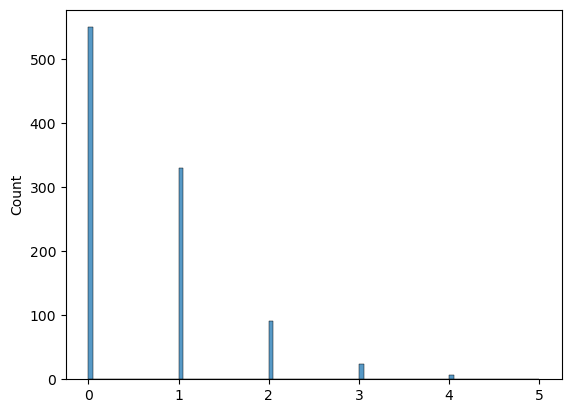

In [20]:
poisson_lambda = 0.6
sampp = stats.poisson(poisson_lambda)
samp_poi = sampp.rvs(size=1000)
sns.histplot(samp_poi, bins=100)


<Axes: ylabel='Count'>

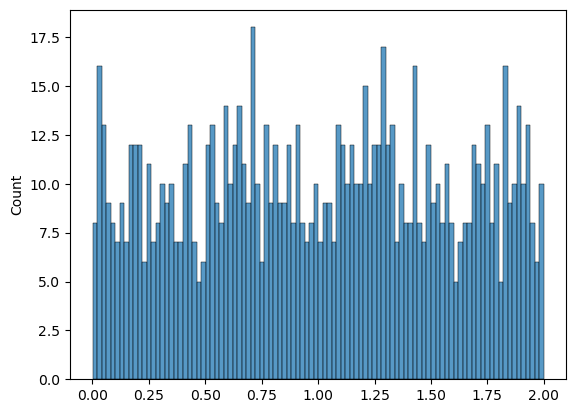

In [21]:
sampu = stats.uniform(0,2)
unifs = sampu.rvs(size=1000);
sns.histplot(unifs, bins=100)


<Axes: ylabel='Count'>

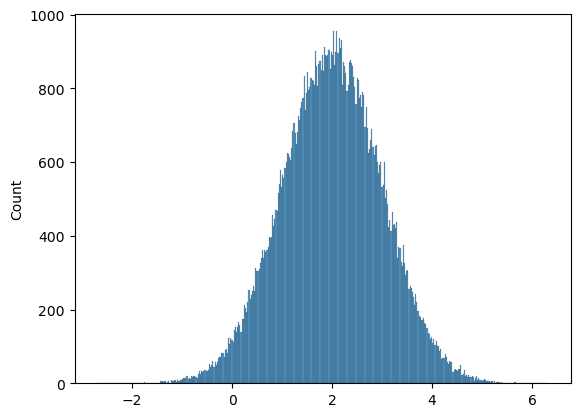

In [22]:
norm = stats.norm(2,1)
norm_sample = norm.rvs(size=100000);
sns.histplot(norm_sample, bins=400)

In [33]:
data = stats.binom(5000,0.2)

In [40]:
data.pmf(200)

1.5243968146123238e-242

In [41]:
data.cdf(200)

1.8288202240294232e-242

In [23]:
norm.cdf(2)

0.5

In [24]:
norm.cdf(3.5)-norm.cdf(2.5)


0.2417303374571288

In [25]:
from scipy import special as spec


In [26]:
spec.kl_div(norm.pdf(1),norm.pdf(2))

0.035986193622717655

In [27]:
whdata = pd.read_csv('weight-height.csv')

In [28]:
whdata.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


2259.295463471085

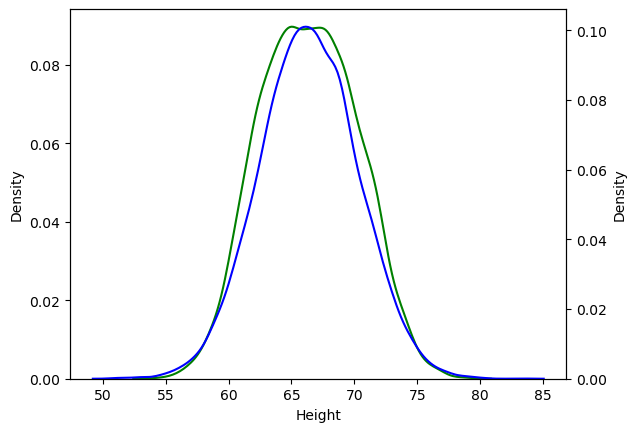

In [29]:
heights = whdata['Height']
mean = np.mean(heights)
std = np.std(heights)

ideal = stats.norm(mean,std)
ideal_sample = ideal.rvs(size=len(whdata));

import matplotlib.pyplot as plt
sns.kdeplot(data=heights, color="g")
ax2 = plt.twinx()
sns.kdeplot(data=ideal_sample, color="b")

np.sum(spec.kl_div(ideal_sample,heights))



In [30]:
spatial.distance.jensenshannon(ideal_sample,heights)

0.029169832550121903

In [45]:
ks_stats, p_value = stats.ks_2samp(ideal_sample, heights)

In [46]:
ks_stats

0.0226

In [44]:
p_value


0.01209899987480774

In [47]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Height', ylabel='Density'>

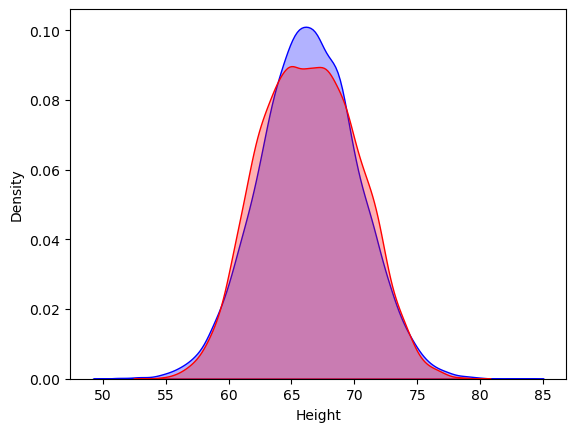

In [53]:
sns.kdeplot(ideal_sample, label='Ideal Sample', color='blue', fill=True, alpha=0.3)
sns.kdeplot(heights, label='Heights', color='red', fill=True, alpha=0.3)

<Axes: xlabel='Height', ylabel='Proportion'>

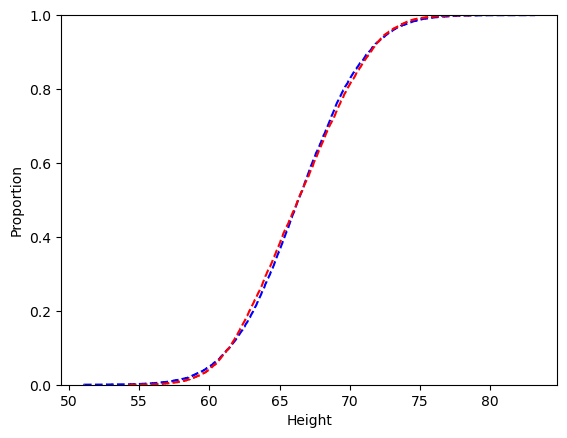

In [49]:
# Plot the empirical distribution functions (ECDFs)
sns.ecdfplot(ideal_sample, label='ECDF of Ideal Sample', color='blue', linestyle='--')
sns.ecdfplot(heights, label='ECDF of Heights', color='red', linestyle='--')

